<a href="https://colab.research.google.com/github/Himanshu-1703/ML_Algorithms/blob/main/Logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [ ]:
# make dataset

X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

Logistic reression works good in linealy separable data.

In [ ]:
X[0:5]

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163]])

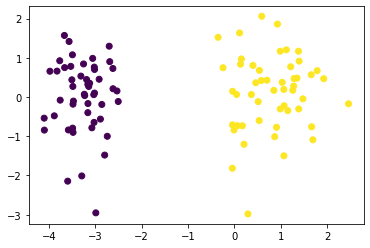

In [ ]:
# plot the data

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
# create weights for the data columns

def create_weights(X):
    weights = np.ones(shape=(X.shape[1]))
    return weights

In [ ]:
# create a step function

def step(z):
    return 1 if z > 0 else 0

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def create_bias(X):
    bias = np.ones(shape=(X.shape[0],1))
    return np.hstack((bias,X))

In [ ]:
X.shape

(100, 2)

In [ ]:
X[12]

array([ 0.29004249, -2.98092432])

In [ ]:
y[12]

1

In [ ]:
def perceptron(X,y,epochs,lr):
    
    X = create_bias(X)
    weights = create_weights(X)

    for i in range(epochs):
        ind = np.random.randint(0,X.shape[0])
        input_arr = X[ind,:]
        true_y = y[ind]
        y_pred = step(np.dot(input_arr,weights))

        weights = weights + (lr * (true_y-y_pred) * input_arr)


    return weights[0],weights[1:]

In [ ]:
bias_percep,weights_percep = perceptron(X,y,1000,0.1)

In [ ]:
print(bias_percep)
print(weights_percep)

1.3000000000000003
[1.05343617 0.2221512 ]


In [ ]:
coeficient_percep = -(weights_percep[0] / weights_percep[1])

intercept_percep = -(bias_percep / weights_percep[1])

In [ ]:
coeficient_percep

-4.741978363208182

In [ ]:
intercept_percep

-5.851870329508209

In [ ]:
# plot the line on the graph

# line = mx + c
x_input = np.linspace(-5.5,0.5,100)
line = (coeficient_percep * x_input) + intercept_percep

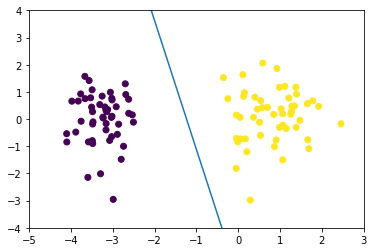

In [ ]:
# plotting

plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,line)
plt.xlim(-5,3)
plt.ylim(-4,4)
plt.show()

In [ ]:
def get_line_percep(X,y,epochs,lr):
    X = create_bias(X)
    weights = create_weights(X)

    for i in range(epochs):
        ind = np.random.randint(0,X.shape[0])
        input_arr = X[ind,:]
        true_y = y[ind]
        y_pred = step(np.dot(input_arr,weights))

        weights = weights + (lr * (true_y-y_pred) * input_arr)
    
    weights = weights[1:]
    bias  = weights[0]
    coeficient = -(weights[0] / weights[1])

    intercept = -(bias/ weights[1])

    # line = mx + c
    x_input = np.linspace(-5.5,0.5,100)
    line = (coeficient * x_input) + intercept

    return line

In [ ]:
def get_line_sigmoid(X,y,epochs,lr):
    X = create_bias(X)
    weights = create_weights(X)

    for i in range(epochs):
        ind = np.random.randint(0,X.shape[0])
        input_arr = X[ind,:]
        true_y = y[ind]
        y_pred = sigmoid(np.dot(input_arr,weights))

        weights = weights + (lr * (true_y-y_pred) * input_arr)
    
    weights = weights[1:]
    bias  = weights[0]
    coeficient = -(weights[0] / weights[1])

    intercept = -(bias/ weights[1])

    # line = mx + c
    x_input = np.linspace(-5.5,0.5,100)
    line = (coeficient * x_input) + intercept

    return line

In [ ]:
def get_line_gd(X,y,epochs,lr):
    X = create_bias(X)
    weights = create_weights(X)

    for i in range(epochs):
        ind = np.random.randint(0,X.shape[0])
        input_arr = X[ind,:]
        true_y = y[ind]
        y_pred = sigmoid(np.dot(input_arr,weights))

        weights = weights + (lr * np.dot((true_y-y_pred),input_arr)/input_arr.shape[0])
    
    weights = weights[1:]
    bias  = weights[0]
    coeficient = -(weights[0] / weights[1])

    intercept = -(bias/ weights[1])

    # line = mx + c
    x_input = np.linspace(-5.5,0.5,100)
    line = (coeficient * x_input) + intercept

    return line

In [ ]:
line_perceptron = get_line_percep(X,y,5000,0.5)

line_sigmoid = get_line_sigmoid(X,y,3000,0.1)

line_gd  = get_line_gd(X,y,5000,0.5)

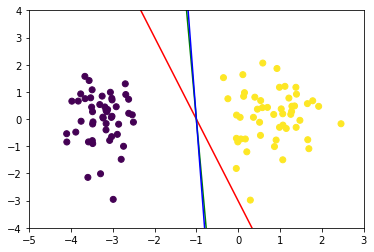

In [ ]:
# plot the graphs

plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,line_perceptron,color='red')
plt.plot(x_input,line_sigmoid,color='green')
plt.plot(x_input,line_gd,color='blue')
plt.xlim(-5,3)
plt.ylim(-4,4)
plt.show()

In [ ]:
# get the line for logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag',penalty=None,max_iter=5000)

lr.fit(X,y)



y_pred_logit = lr.predict(X)


In [ ]:
# coef and intercept for logistic

m = -lr.coef_[0][0] / lr.coef_[0][1]
c = - lr.intercept_ / lr.coef_[0][1]

In [ ]:
# make line for logistic regression

line_logistic = (m * x_input) + c

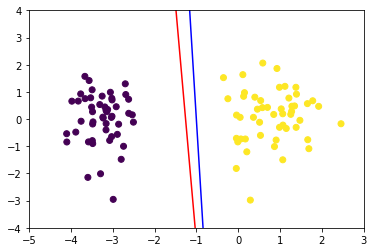

In [ ]:
# plot the graphs

plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,line_logistic,color='red')
plt.plot(x_input,line_gd,color='blue')
plt.xlim(-5,3)
plt.ylim(-4,4)
plt.show()
